# Praduman Pandey             19BCE0208

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [3]:
dftrain=pd.read_csv('pulsar_data_train.csv')
dftest=pd.read_csv('pulsar_data_test.csv')

In [4]:
dftrain.shape, dftest.shape

((12528, 9), (5370, 9))

In [5]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [6]:
dftrain.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [7]:
dftrain.isnull().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

In [8]:
print((1735/dftrain.shape[0])*100)

13.848978288633463


In [9]:
dftrain.columns = dftrain.columns.str.strip()

<AxesSubplot:ylabel='Density'>

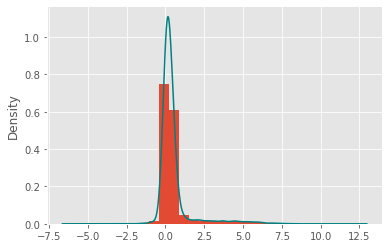

In [10]:
ax = dftrain['Excess kurtosis of the integrated profile'].hist(bins=15, density=True, stacked=True)
dftrain['Excess kurtosis of the integrated profile'].plot(kind='density', color='teal')


In [11]:
dftrain['Excess kurtosis of the integrated profile'].fillna(dftrain['Excess kurtosis of the integrated profile'].mean(),inplace=True)

In [12]:
dftrain['Excess kurtosis of the integrated profile'].isnull().sum()

0

<AxesSubplot:ylabel='Density'>

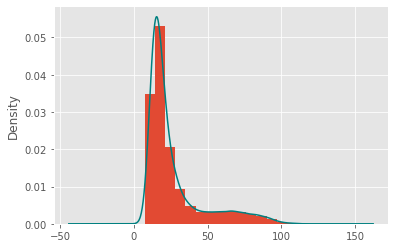

In [13]:
bx = dftrain['Standard deviation of the DM-SNR curve'].hist(bins=15, density=True, stacked=True)
dftrain['Standard deviation of the DM-SNR curve'].plot(kind='density', color='teal')

In [14]:
dftrain['Standard deviation of the DM-SNR curve'].fillna(dftrain['Standard deviation of the DM-SNR curve'].median(),inplace=True)

In [15]:
dftrain['Standard deviation of the DM-SNR curve'].isnull().sum()

0

In [16]:
(dftrain['Skewness of the DM-SNR curve'].isnull().sum()/dftrain.shape[0])*100

4.988825031928481

<AxesSubplot:ylabel='Density'>

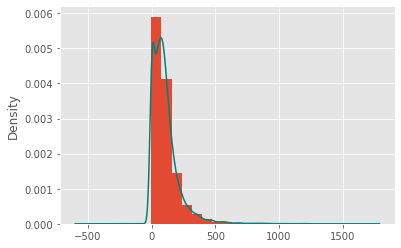

In [17]:
cx = dftrain['Skewness of the DM-SNR curve'].hist(bins=15, density=True, stacked=True)
dftrain['Skewness of the DM-SNR curve'].plot(kind='density', color='teal')

In [18]:
dftrain['Skewness of the DM-SNR curve'].fillna(dftrain['Skewness of the DM-SNR curve'].median(),inplace=True)

In [19]:
dftrain.isnull().sum()

Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
target_class                                    0
dtype: int64

Text(0, 0.5, '')

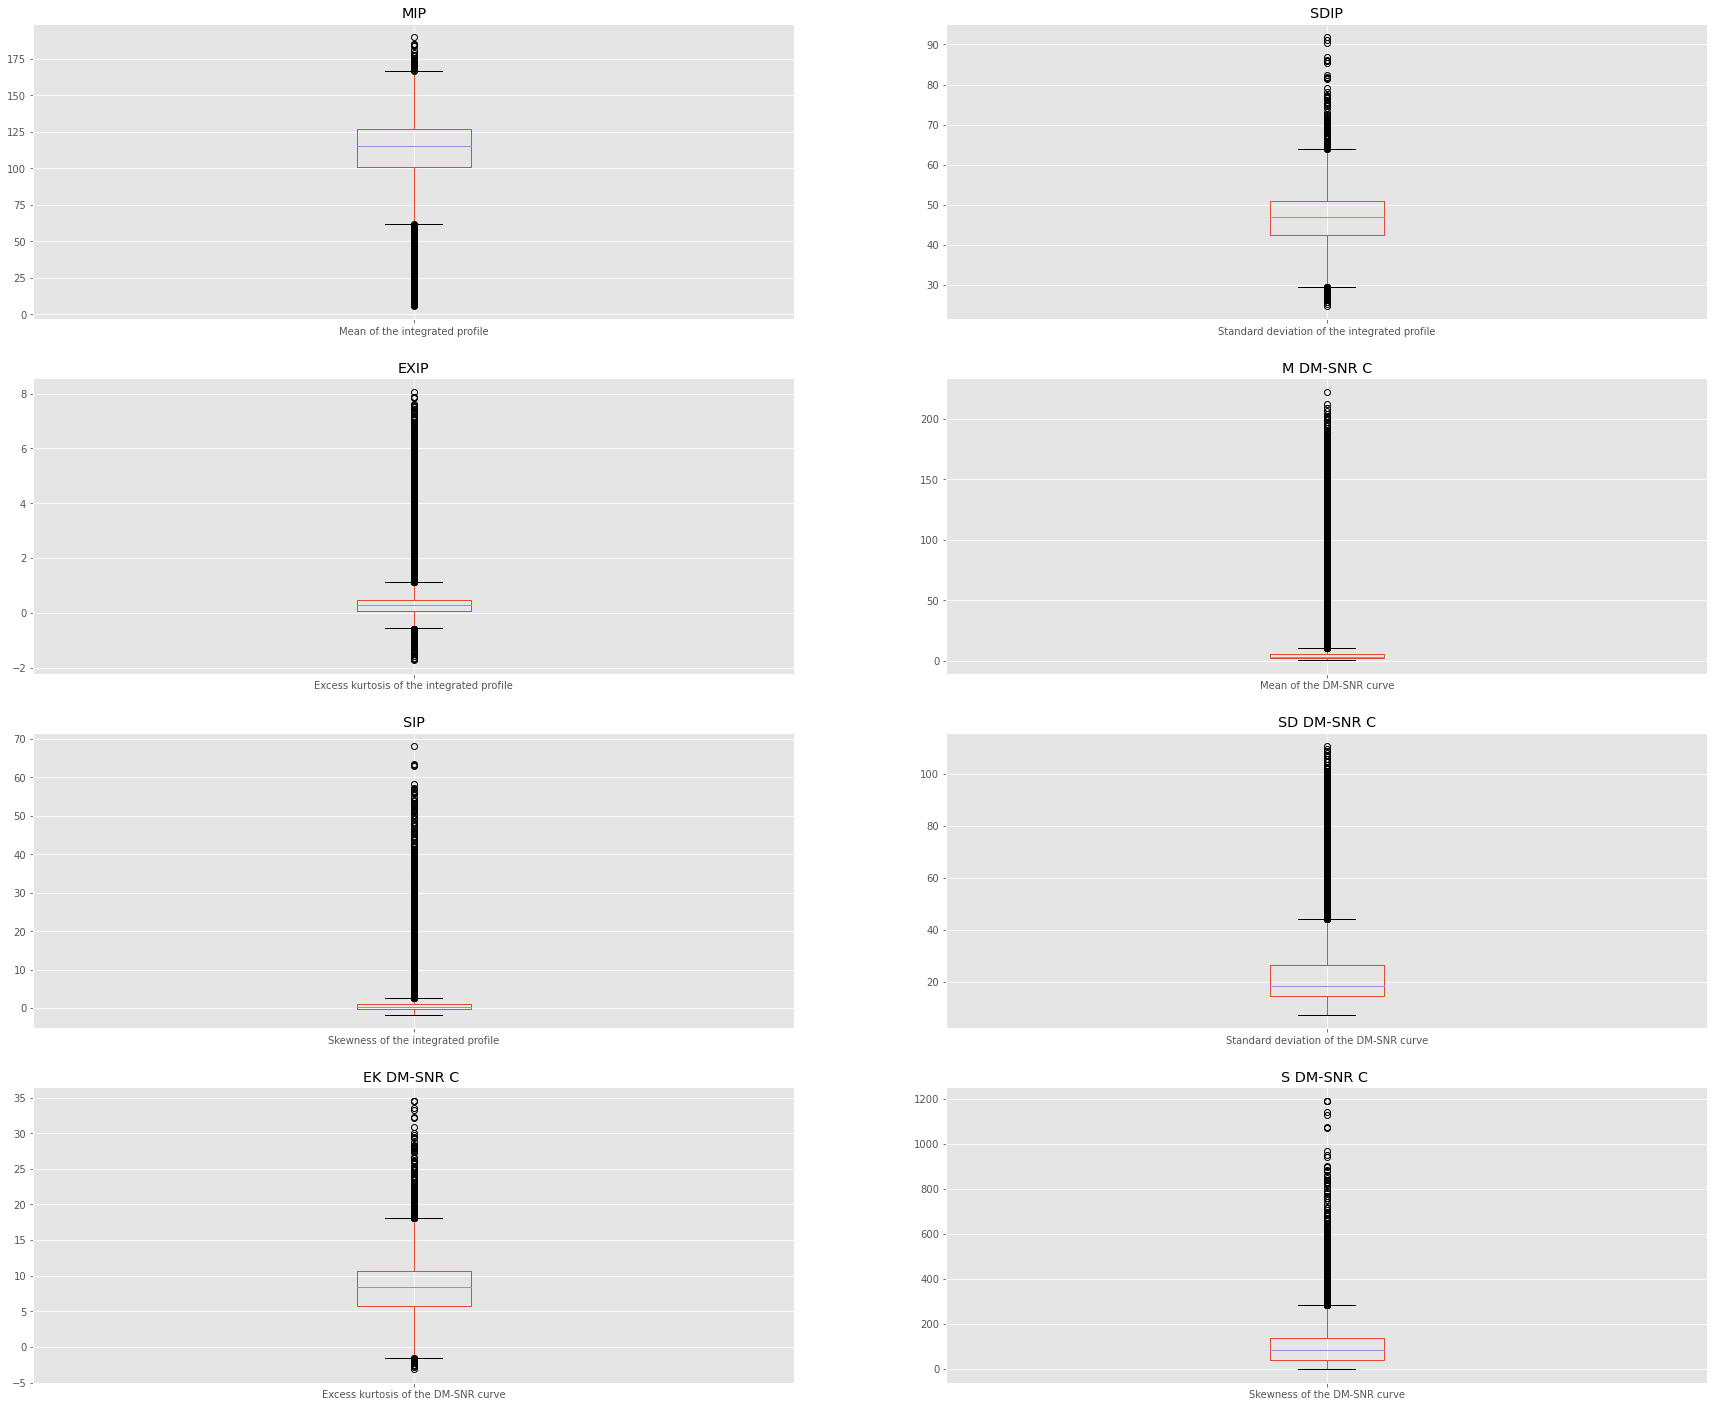

In [20]:
plt.figure(figsize=(30,25))

plt.subplot(4,2,1)
a=dftrain.boxplot(column='Mean of the integrated profile')
a.set_title('MIP')
a.set_xlabel('')
a.set_ylabel('')

plt.subplot(4,2,2)
a=dftrain.boxplot(column='Standard deviation of the integrated profile')
a.set_title('SDIP')
a.set_xlabel('')
a.set_ylabel('')

plt.subplot(4,2,3)
a=dftrain.boxplot(column='Excess kurtosis of the integrated profile')
a.set_title('EXIP')
a.set_xlabel('')
a.set_ylabel('')

plt.subplot(4,2,4)
a=dftrain.boxplot(column='Mean of the DM-SNR curve')
a.set_title('M DM-SNR C')
a.set_xlabel('')
a.set_ylabel('')

plt.subplot(4,2,5)
a=dftrain.boxplot(column='Skewness of the integrated profile')
a.set_title('SIP')
a.set_xlabel('')
a.set_ylabel('')

plt.subplot(4,2,6)
a=dftrain.boxplot(column='Standard deviation of the DM-SNR curve')
a.set_title('SD DM-SNR C')
a.set_xlabel('')
a.set_ylabel('')

plt.subplot(4,2,7)
a=dftrain.boxplot(column='Excess kurtosis of the DM-SNR curve')
a.set_title('EK DM-SNR C ')
a.set_xlabel('')
a.set_ylabel('')

plt.subplot(4,2,8)
a=dftrain.boxplot(column='Skewness of the DM-SNR curve')
a.set_title('S DM-SNR C ')
a.set_xlabel('')
a.set_ylabel('')



In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x=dftrain.drop('target_class',axis=1)
y=dftrain['target_class']
xtrain,xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [23]:
xtrain.shape, xtest.shape

((10022, 8), (2506, 8))

In [24]:
cols=xtrain.columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

xtrain=pd.DataFrame(xtrain, columns=[cols])
xtest=pd.DataFrame(xtest, columns=[cols])


In [25]:
xtrain.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
count,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04,1.002200e+04
mean,-2.459299e-16,-7.557537e-16,-1.001771e-16,-3.175468e-17,-3.442722e-17,-3.279323e-17,-1.339313e-16,1.089951e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-4.059253e+00,-3.121855e+00,-2.221072e+00,-5.703669e-01,-4.225211e-01,-9.679603e-01,-2.526379e+00,-1.014557e+00
25%,-3.943394e-01,-6.101706e-01,-4.261366e-01,-3.175801e-01,-3.653436e-01,-5.767818e-01,-5.589324e-01,-6.338157e-01
50%,1.619199e-01,5.986146e-02,-1.916573e-01,-2.549120e-01,-3.355278e-01,-3.831715e-01,2.442155e-02,-2.028493e-01
75%,6.265131e-01,6.579129e-01,-6.261144e-03,-1.397269e-01,-2.459675e-01,5.550782e-02,5.276848e-01,2.991024e-01
max,3.045294e+00,6.647182e+00,7.578695e+00,1.045442e+01,7.074053e+00,4.501370e+00,5.769814e+00,1.036396e+01


In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc=SVC()
svc.fit(xtrain,ytrain)

ypred=svc.predict(xtest)

print(accuracy_score(ytest, ypred))

0.9796488427773344


In [27]:
svc=SVC(C=100)
svc.fit(xtrain,ytrain)

ypred=svc.predict(xtest)

print(accuracy_score(ytest, ypred))

0.9796488427773344


In [28]:
svc=SVC(C=1000)
svc.fit(xtrain,ytrain)

ypred=svc.predict(xtest)

print(accuracy_score(ytest, ypred))

0.9808459696727854


In [29]:
linear_svc=SVC(kernel='linear',C=1)
linear_svc.fit(xtrain,ytrain)

ypred=linear_svc.predict(xtest)

print(accuracy_score(ytest, ypred))

0.9780526735833999


In [30]:
linear_svc=SVC(kernel='linear',C=1000)
linear_svc.fit(xtrain,ytrain)

ypred=linear_svc.predict(xtest)

print(accuracy_score(ytest, ypred))

0.9780526735833999


In [31]:
print(linear_svc.score(xtrain,ytrain))
print(linear_svc.score(xtest,ytest))

0.9755537816803034
0.9780526735833999


In [32]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(ytest,ypred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives = ', cm[0,0])

print('\nTrue Negatives = ', cm[1,1])

print('\nFalse Positives = ', cm[0,1])

print('\nFalse Negatives = ', cm[1,0])

Confusion matrix

 [[2277    8]
 [  47  174]]

True Positives =  2277

True Negatives =  174

False Positives =  8

False Negatives =  47


In [33]:
from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2285
         1.0       0.96      0.79      0.86       221

    accuracy                           0.98      2506
   macro avg       0.97      0.89      0.93      2506
weighted avg       0.98      0.98      0.98      2506

